# P1_FIFA_MoneyBall

This is the first project of the Ironhack Data Analytics course

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import statsmodels.api as sm
import math
import statistics 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

LIFE_UNIVERSE_AND_EVERYTHING = 42

pd.options.display.max_columns = None

# 01 - Problem

* Data regarding FIFA League.

* Goal: stablish correlation between skill and player value.

Data cleaning, wrangling and EDA on a database relative to football players from FIFA League. The goal is to analyze the data and define a model that fits to do predictions. The variable 'value' should be considered as a target.

# 02 - Getting Data

Read the .csv file.

In [6]:
data = pd.read_csv(r'C:\Users\claud\P1_FIFA_MoneyBall\Data\fifa21_male2.csv')
data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


# 03 - Cleaning/Wrangling/EDA

* Change headers names.
* Deal with NaN values.
* Categorical Features. -> not here
* Numerical Features.
* Exploration.

In [7]:
# Standardizing headers by removing spaces and capital letters
data.columns = [x.strip(' ').lower() for x in data.columns]
data.head()

,id,name,age,ova,nationality,club,bov,bp,position,player photo,club logo,flag photo,pot,team & contract,height,weight,foot,growth,joined,loan date end,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [8]:
# checking gender <> male
data['gender'].unique()

array(['Male'], dtype=object)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, id to gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [10]:
# Getting the players with more than 1 occurence of the name
players = data['name'].value_counts()
players[:10]

J. Rodríguez    10
A. Traoré        8
J. Rojas         8
J. Jones         7
M. Smith         7
R. Williams      7
Paulinho         7
R. Fernández     6
J. Williams      6
J. Sánchez       6
Name: name, dtype: int64

In [11]:
# Checking the players name wiht more appearances
a = data[data['name'] == 'J. Rodríguez']
a

,id,name,age,ova,nationality,club,bov,bp,position,player photo,club logo,flag photo,pot,team & contract,height,weight,foot,growth,joined,loan date end,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
486,140038,J. Rodríguez,37,67,Mexico,Monarcas Morelia,67,CM,CDM CM,https://cdn.sofifa.com/players/140/038/18_120.png,https://cdn.sofifa.com/teams/1028/light_60.png,https://cdn.sofifa.com/flags/mx.png,67,"Monarcas Morelia Jun 30, 2018 On Loan","5'5""",150lbs,Right,0,"Dec 17, 2014","Jun 30, 2018",€50K,€5K,€0,"Jun 30, 2018 On Loan",299,68,51,43,69,68.0,349,62,75.0,75,68,69,283,42,34,63.0,67,77.0,330,76,53.0,60,66,75,345,67,66.0,60.0,68.0,84,69.0,189,65,67,57.0,57,15,7,11,9,15,1852,363,4 ★,2★,Medium,Medium,1 ★,38,64,69,65,63,64,4,59+1,59+1,59+1,61+0,62+0,62+0,62+0,61+0,64+1,64+1,64+1,61+1,67+0,67+0,67+0,61+1,62+1,66+1,66+1,66+1,62+1,61+1,62+1,62+1,62+1,61+1,18+1,Male
2729,192009,J. Rodríguez,27,71,Mexico,Guadalajara,71,GK,GK,https://cdn.sofifa.com/players/192/009/20_120.png,https://cdn.sofifa.com/teams/1880/light_60.png,https://cdn.sofifa.com/flags/mx.png,74,Guadalajara 2012 ~ 2020,"6'1""",187lbs,Right,3,"Jul 2, 2012",NaN,€2.1M,€21K,€3.7M,2012 ~ 2020,97,15,11,11,49,11.0,91,10,12.0,11,35,23,299,58,56,57.0,70,58.0,249,50,74.0,37,78,10,121,31,15.0,10.0,44.0,21,50.0,39,16,11,12.0,348,74,65,66,73,70,1244,405,3 ★,1★,Medium,Medium,1 ★,74,65,66,70,57,73,10,30+2,30+2,30+2,30+0,30+0,30+0,30+0,30+0,33+2,33+2,33+2,32+2,33+2,33+2,33+2,32+2,29+2,32+2,32+2,32+2,29+2,28+2,29+2,29+2,29+2,28+2,70+2,Male
3402,198710,J. Rodríguez,28,82,Colombia,Everton,82,CAM,CAM CM RM,https://cdn.sofifa.com/players/198/710/20_120.png,https://cdn.sofifa.com/teams/7/light_60.png,https://cdn.sofifa.com/flags/co.png,82,Everton 2020 ~ 2022,"5'11""",165lbs,Left,0,"Sep 7, 2020",NaN,€22.5M,€105K,€42.8M,2020 ~ 2022,409,90,84,62,83,90.0,432,86,89.0,86,81,90,345,55,52,78.0,84,76.0,353,86,46.0,65,64,92,359,60,55.0,80.0,83.0,81,87.0,137,52,41,44.0,64,15,15,15,5,14,2099,423,2 ★,4★,Medium,Medium,4 ★,53,86,85,86,50,63,4.1K,79+3,79+3,79+3,81+0,81+0,81+0,81+0,81+0,82+0,82+0,82+0,80+2,80+2,80+2,80+2,80+2,67+3,67+3,67+3,67+3,67+3,62+3,57+3,57+3,57+3,62+3,20+3,Male
6873,220605,J. Rodríguez,24,64,Colombia,Club Necaxa,69,RM,ST CAM LM,https://cdn.sofifa.com/players/220/605/20_120.png,https://cdn.sofifa.com/teams/101121/light_60.png,https://cdn.sofifa.com/flags/co.png,71,Club Necaxa 2020 ~ 2021,"5'10""",157lbs,Right,7,"Jun 18, 2020",NaN,€650K,€3K,€1.2M,2020 ~ 2021,291,62,62,51,65,51.0,325,72,62.0,65,56,70,367,84,74,70.0,63,76.0,280,64,47.0,64,50,55,263,42,32.0,66.0,62.0,61,71.0,116,55,31,30.0,56,9,10,12,12,13,1698,365,4 ★,4★,Medium,Low,1 ★,79,61,62,71,40,52,6,64+2,64+2,64+2,68+0,67+0,67+0,67+0,68+0,66+2,66+2,66+2,67+2,61+2,61+2,61+2,67+2,55+2,51+2,51+2,51+2,55+2,52+2,45+2,45+2,45+2,52+2,17+2,Male
7494,223816,J. Rodríguez,26,78,Uruguay,Cruz Azul,79,ST,ST LW,https://cdn.sofifa.com/players/223/816/20_120.png,https://cdn.sofifa.com/teams/1878/light_60.png,https://cdn.sofifa.com/flags/uy.png,79,Cruz Azul 2019 ~ 2022,"5'10""",174lbs,Right,1,"Jan 1, 2019",NaN,€12.5M,€68K,€22.2M,2019 ~ 2022,361,68,82,71,70,70.0,353,81,64.0,62,65,81,405,90,84,85.0,75,71.0,380,78,70.0,84,76,72,325,68,35.0,78.0,68.0,76,72.0,108,23,40,45.0,53,12,14,10,7,10,1985,428,3 ★,4★,High,Medium,1 ★,87,78,68,81,38,76,81,78+1,78+1,78+1,78+0,78+0,78+0,78+0,78+0,76+2,76+2,76+2,77+2,70+2,70+2,70+2,77+2,62+2,58+2,58+2,58+2,62+2,59+2,53+2,53+2,53+2,59+2,18+2,

In [12]:
# 'id' is the unique id, so I passed it as the index
data = data.set_index('id')

In [13]:
# Checking NaN values
pd.set_option('max_row', None)
data.isnull().sum()

name                    0
age                     0
ova                     0
nationality             0
club                   23
bov                     0
bp                      0
position              413
player photo            0
club logo              23
flag photo              0
pot                     0
team & contract         0
height                  0
weight                  0
foot                    0
growth                  0
joined                 58
loan date end       16215
value                   0
wage                    0
release clause          0
contract                0
attacking               0
crossing                0
finishing               0
heading accuracy        0
short passing           0
volleys                58
skill                   0
dribbling               0
curve                  58
fk accuracy             0
long passing            0
ball control            0
movement                0
acceleration            0
sprint speed            0
agility     

In [14]:
# Correcting NaN values

# Categorical variables

data['club'] = data['club'].fillna(str(data['club'].mode()))
data['position'] = data['position'].fillna(str(data['position'].mode()))
data['club logo'] = data['club logo'].fillna(str(data['club logo'].mode()))
data['a/w'] = data['a/w'].fillna(str(data['a/w'].mode()))
data['d/w'] = data['d/w'].fillna(str(data['d/w'].mode()))

# Datetime variables

data['joined'] = data['joined'].fillna(str(data['joined'].mode()))

# Numerical variables
data['volleys'] = data['volleys'].fillna(float(data['volleys'].mode()))
data['curve'] = data['curve'].fillna(float(data['curve'].mode()))
data['agility'] = data['agility'].fillna(float(data['agility'].mode()))
data['balance'] = data['balance'].fillna(float(data['balance'].mode()))
data['jumping'] = data['jumping'].fillna(float(data['jumping'].mode()))
data['interceptions'] = data['interceptions'].fillna(float(data['interceptions'].mode()))
data['positioning'] = data['positioning'].fillna(float(data['positioning'].mode()))
data['vision'] = data['vision'].fillna(float(data['vision'].mode()))
data['composure'] = data['composure'].fillna(float(data['composure'].mode()))
data['sliding tackle'] = data['sliding tackle'].fillna(float(data['sliding tackle'].mode()))

In [15]:
# Checking NaN values
pd.set_option('max_row', None)
data.isnull().sum()

name                    0
age                     0
ova                     0
nationality             0
club                    0
bov                     0
bp                      0
position                0
player photo            0
club logo               0
flag photo              0
pot                     0
team & contract         0
height                  0
weight                  0
foot                    0
growth                  0
joined                  0
loan date end       16215
value                   0
wage                    0
release clause          0
contract                0
attacking               0
crossing                0
finishing               0
heading accuracy        0
short passing           0
volleys                 0
skill                   0
dribbling               0
curve                   0
fk accuracy             0
long passing            0
ball control            0
movement                0
acceleration            0
sprint speed            0
agility     

In [16]:
# Conversion of 'height'
data["height"] = data["height"].str.replace('"',"")
data['height'] = data['height'].apply(lambda x: int(x.split("'")[0])*30.48 + int(x.split("'")[1])*2.54)

In [17]:
# Conversion of 'weight'
data["weight"] = data["weight"].str.replace('lbs',"")
data['weight'] = data['weight'].apply(lambda x: round(int(x)*0.453592, 2))

In [18]:
# Conversion of 'joined'
data['joined'] = pd.to_datetime(data['joined'], errors='coerce')

In [19]:
# Checking monetary values
data['value'].value_counts()[:10]

€1.1M    500
€0       457
€1M      347
€325K    342
€450K    341
€1.2M    332
€275K    307
€550K    299
€475K    298
€525K    284
Name: value, dtype: int64

In [20]:
def value(x):
    if x.endswith('K'):
        return float(x.split("K")[0])*1000
    elif x.endswith('M'):
        return float(x.split("M")[0])*1000000
    else:
        return float(x)

In [21]:
# Conversion of 'value'
data["value"] = data["value"].str.replace('€',"")
data['value'] = data['value'].apply(value)

In [22]:
# Conversion of 'wage'
data["wage"] = data["wage"].str.replace('€',"")
data['wage'] = data['wage'].apply(value)

In [23]:
# Conversion of 'release clause'
data["release clause"] = data["release clause"].str.replace('€',"")
data['release clause'] = data['release clause'].apply(value)

In [24]:
# Checking '0' for 'value', 'wage', 'release clause'
vl = [data['value'], data['wage'], data['release clause']]

mean = []
median = []
mode = []
zeros = []
zerosP = []

for x in vl:
    mean.append("{:,}".format(round(x.mean(), 2)))
    median.append("{:,}".format(round(x.median(), 2)))
    mode.append(round(x.mode(), 2))
    zeros.append((x == 0).sum())
    zerosP.append("{:.2%}".format((x == 0).sum()/len(x)))
    
df2 = pd.DataFrame(np.array([zeros, zerosP, mean, median, mode]),
                   index = ['zeros', 'zerosP', 'mean', 'median', 'mode'],
                  columns = ['value', 'wage', 'release clause'])
df2

,value,wage,release clause
zeros,457,423,1785
zerosP,2.67%,2.47%,10.42%
mean,"2,567,377.17","10,532.93","4,574,445.49"
median,"800,000.0","3,000.0","1,300,000.0"
mode,0 1100000.0 dtype: float64,0 2000.0 dtype: float64,0 0.0 dtype: float64


In [27]:
# Correction and check of the zeros on 'value'

value_median = round(data['value'].median(), 2)
data.loc[data.value == 0, 'value'] = value_median
(data['value'] == 0).sum()

0

In [28]:
# Correction and check of the zeros on 'wage'

wage_median = round(data['wage'].median(), 2)
data.loc[data.wage == 0, 'wage'] = wage_median
(data['wage'] == 0).sum()

0

In [29]:
# Correction and check of the zeros on 'release clause'

release_clause_median = round(data['release clause'].median(), 2)
data.loc[data['release clause'] == 0, 'release clause'] = release_clause_median
(data['release clause'] == 0).sum()

0

In [30]:
# deleting columns 'loan end date', 'name', 'player photo', 'club logo', 'flag photo', 'gender'
# data = data.drop(['loan date end', 'name', 'player photo', 'club logo', 'flag photo', 'gender'], axis = 1)

# other option:
data.drop(['loan date end', 'name', 'player photo', 'club logo', 'flag photo', 'gender'], axis = 1, inplace = True)

In [32]:
# checking position options
data['bp'].unique()

array(['LWB', 'CM', 'CAM', 'ST', 'RW', 'CB', 'CF', 'GK', 'CDM', 'RWB',
       'LB', 'LM', 'RM', 'RB', 'LW'], dtype=object)

In [ ]:
# criar funçao para dividir entre: ataque, defesa e goleiro
# shooting = 'ST'
# goalkeeping = 'GK'
# defending = else

In [59]:
# dividir tempo de contrato

In [ ]:
# converter w/f, sm e ir

In [33]:
# summary of the data
data.describe().T.apply(lambda x: round(x,2)) # a lambda just to round it pretty

,count,mean,std,min,25%,50%,75%,max
age,17125.0,25.27,4.94,16.00,21.00,25.00,29.00,5.300000e+01
ova,17125.0,66.97,6.86,38.00,62.00,67.00,72.00,9.300000e+01
bov,17125.0,67.90,6.64,42.00,64.00,68.00,72.00,9.300000e+01
pot,17125.0,72.49,5.77,47.00,69.00,72.00,76.00,9.500000e+01
height,17125.0,181.22,6.89,154.94,175.26,180.34,185.42,2.057400e+02
weight,17125.0,75.14,7.18,49.90,69.85,74.84,79.83,1.102200e+02
growth,17125.0,5.52,5.79,-1.00,0.00,4.00,9.00,2.600000e+01
value,17125.0,2588726.07,5363960.16,1000.00,425000.00,800000.00,2400000.00,1.055000e+08
wage,17125.0,10607.03,21113.57,250.00,2000.00,3000.00,11000.00,5.600000e+05
release clause,17125.0,4709949.14,10286002.27,5000.00,784000.00,1300000.00,3900000.00,2.031000e+08


In [34]:
# Checking and correcting negative value from 'growth'
(data['growth'] == -1).sum()

1

In [35]:
data['growth'][data[data['growth'] == -1].index.tolist()] = int(data['growth'].mode())

In [36]:
(data['growth'] == -1).sum()

0

In [ ]:
# ploting data
for column in data.select_dtypes(include=[np.number]).columns:
    sns.distplot(data.select_dtypes(include=[np.number])[column])
    plt.show()

In [ ]:
# check the correlations
mask = np.zeros_like(data.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(40, 32))
ax = sns.heatmap(data.corr(), mask=mask, annot=True) # annot = None instead of True for a better visualization
plt.show()

In [ ]:
# correlation visualization

x = data['growth']
y = data['age']

plt.scatter(x, y)
plt.show()

# 04 - Processing Data

* Dealing with outliers.
* Normalization.
* Encoding Categorical Data.
* Splitting into train set and test set.

In [37]:
numerical = data.select_dtypes(include=[np.number])

X = numerical.drop(['value'], axis=1)
y = numerical['value']

# with 'add_constant' we force the model to have an intercept
X = sm.add_constant(X)

model = sm.OLS(y,X).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.045e+04
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:47:34   Log-Likelihood:            -2.5976e+05
No. Observations:               17125   AIC:                         5.196e+05
Df Residuals:                   17072   BIC:                         5.200e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.863e+06   4.01e+05  

In [38]:
def boxcox_transform(data):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].mean())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci

In [39]:
data2, _ci = boxcox_transform(data)
data2.head()

,age,ova,nationality,club,bov,bp,position,pot,team & contract,height,weight,foot,growth,joined,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,2.333615,58.848889,Italy,Udinese,56.738223,LWB,LM,13.172802,Udinese 2008 ~ 2016,114.966468,5.547642,Left,4.584237,2008-07-01,8.389583,5.771627,6.895413,2008 ~ 2016,56934.043922,519.861971,92.405244,623.109242,14332.041639,72.915777,21126.604194,3509.565771,127.877475,34.968870,799.195128,14162.192412,712496.156462,3459.596157,4688.176875,1981.442050,209.911868,1622.868219,89046.968991,590.769067,970.478995,2925.748078,830.772753,201.671066,68971.821546,362.090908,61.975681,434.387332,350.159771,126.870774,909.589601,214.493502,87.313895,80.681960,58.503163,1.028941,1.190123,0.956792,1.209168,1.123424,1.158236,1.703642e+07,596.439191,3 ★,2★,Medium,High,2 ★,2463.742155,453.868664,283.726599,4182.873266,75.923321,2907.224432,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0
16,2.380795,60.507424,Spain,KAS Eupen,55.975537,CM,CM CAM CDM,13.376923,KAS Eupen 2014 ~ 2019,112.090511,5.184674,Right,4.584237,2014-07-19,8.374740,5.771627,6.862989,2014 ~ 2019,66139.801903,446.511318,124.781721,659.693264,16939.287403,86.727781,24768.294488,3122.648141,162.111865,44.262983,839.115074,14162.192412,518895.289657,2297.446850,2025.133541,1653.439850,193.813258,1809.577659,77245.658833,603.532778,645.922523,2506.594458,669.571752,213.590543,88882.191075,354.719134,63.749630,536.295925,407.209589,216.175597,1284.612079,157.118281,87.313895,48.695660,34.348698,1.028941,1.110789,1.163142,1.186805,1.140941,1.143180,1.657047e+07,560.298652,4 ★,3★,Medium,Medium,1 ★,1375.061893,584.977081,301.077674,3935.403734,64.221941,2411.757129,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1
27,2.333615,60.507424,England,Coventry City,56.738223,CAM,CAM RM RW LM,13.376923,Coventry City 2016 ~ 2020,110.649171,5.366292,Right,4.584237,2016-01-07,8.590480,6.061566,6.895413,2016 ~ 2020,66139.801903,574.633760,124.781721,334.145282,17491.941822,96.492519,27001.185770,4133.894547,174.662447,43.304106,799.195128,17835.988029,478077.050523,1659.915979,1394.141014,2156.312892,170.278947,1955.929533,58781.335699,565.546685,732.813200,492.274028,594.495281,205.625599,67648.651696,340.121212,35.160563,501.458830,415.589191,182.766738,909.589601,100.952649,41.083240,37.831809,25.852162,1.026811,1.110789,1.010981,1.186805,1.199238,1.047854,1.396395e+07,511.846827,4 ★,4★,Medium,Low,2 ★,992.112263,571.299910,318.724409,4973.603546,38.771068,1626.147109,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0
36,2.369619,58.018831,Trinidad &amp; Tobago,Sunderland,55.975537,ST,0 CB\ndtype: object,14.448024,Sunderland 2009,113.529599,5.404041,Right,7.071382,NaT,8.478372,5.420940,6.895413,2009,40306.154688,312.146481,139.135727,641.293042,19213.448114,60.642501,12677.794057,3029.567954,104.337581,27.800399,702.942079,17280.310143,134343.664473,2564.666312,3209.860895,1981.442050,155.019643,1622.868219,41107.783595,457.197100,1021.446136,1571.713825,789.111882,166.953300,49004.057770,270.145711,62.862834,536.

In [40]:
_ci

{'age': [-0.2492783223122066],
 'ova': [0.9559340098746975],
 'bov': [0.9363406018152075],
 'pot': [0.462816532335289],
 'height': [0.8904817888150178],
 'weight': [0.10062826176134461],
 'growth': [0.6548833329051343],
 'value': [-0.07592118632768505],
 'wage': [-0.10468371891093695],
 'release clause': [-0.1171507726439801],
 'attacking': [2.0286486399677433],
 'crossing': [1.5502591609693437],
 'finishing': [1.2074645347783597],
 'heading accuracy': [1.7098752643416035],
 'short passing': [2.455915348627106],
 'volleys': [1.0779671885958868],
 'skill': [1.8122630422334134],
 'dribbling': [2.0725429324135796],
 'curve': [1.2091429502602014],
 'fk accuracy': [0.8312613732385926],
 'long passing': [1.7046579625616651],
 'ball control': [2.4528230870988574],
 'movement': [2.4576762623525266],
 'acceleration': [2.1080164593136406],
 'sprint speed': [2.140783250186526],
 'agility': [1.9585298878106112],
 'reactions': [1.3311708067126025],
 'balance': [1.9046193475349376],
 'power': [2.073

In [41]:
X = data2.select_dtypes(include=[np.number]).drop(['value'], axis=1)
y = data2.select_dtypes(include=[np.number])['value']

# with 'add_constant' we force the model to have an intercept
X = sm.add_constant(X)

model = sm.OLS(y,X).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     6323.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:48:20   Log-Likelihood:                 15447.
No. Observations:               17125   AIC:                        -3.078e+04
Df Residuals:                   17066   BIC:                        -3.032e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7364      0.561  

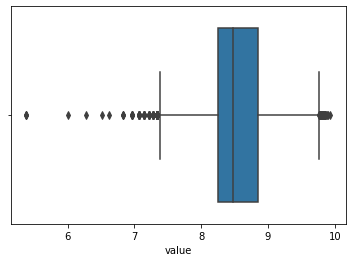

In [42]:
# checking for outliers 'value'
sns.boxplot(x=data2['value'])
plt.show()

In [43]:
# removing outliers from 'value' (defining interquartile range)

data3 = data2.copy()

iqrPremium = np.percentile(data3['value'],75) - np.percentile(data3['value'],25)
upper_limitPremium = np.percentile(data3['value'],75) + 1.5*iqrPremium
lower_limitPremium = np.percentile(data3['value'],25) - 1.5*iqrPremium
data3 = data3[(data3['value']>lower_limitPremium) & (data3['value']<upper_limitPremium)]

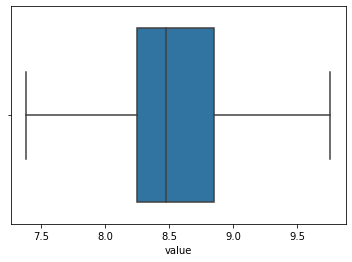

In [44]:
# checking for outliers 'value' after change
sns.boxplot(x=data3['value'])
plt.show()

In [45]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17009 entries, 2 to 259105
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   age               17009 non-null  float64       
 1   ova               17009 non-null  float64       
 2   nationality       17009 non-null  object        
 3   club              17009 non-null  object        
 4   bov               17009 non-null  float64       
 5   bp                17009 non-null  object        
 6   position          17009 non-null  object        
 7   pot               17009 non-null  float64       
 8   team & contract   17009 non-null  object        
 9   height            17009 non-null  float64       
 10  weight            17009 non-null  float64       
 11  foot              17009 non-null  object        
 12  growth            17009 non-null  float64       
 13  joined            16951 non-null  datetime64[ns]
 14  value             17

In [ ]:
# encoding categorical
data3 = pd.get_dummies(data3, 
                       columns = ['nationality', 'club', 'bp', 'foot', 'a/w', 'd/w'],
                       drop_first=True)
data3.head()

In [ ]:
# check the correlations
mask = np.zeros_like(data3.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(40, 32))
ax = sns.heatmap(data2.corr(), mask=mask, annot=True) # annot = None instead of True for a better visualization
plt.show()

In [46]:
# splitting our data

numerical = data3.select_dtypes(include=[np.number])

X = numerical.drop('value', axis=1)
y = numerical['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=LIFE_UNIVERSE_AND_EVERYTHING)

# 05 - Modeling

Apply model.

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
predictions  = model.predict(X_test)
predictions.shape

(5103,)

# 06 - Model Validation

* R2.
* MSE.
* RMSE.
* MAE.

In [49]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.961099288164485, 0.05261487923526722, 0.08929961161112812)

In [50]:
r2 = r2_score(y_test, predictions)
print(r2)

0.961099288164485


In [51]:
mse = mean_squared_error(y_test, predictions)
print(mse)

0.007974420633898329


In [52]:
rmse = math.sqrt(mse)
print(rmse)

0.08929961161112812


In [53]:
mae = mean_absolute_error(y_test, predictions)
print(mae)

0.05261487923526722


In [54]:
model.coef_

array([-9.06260913e-01,  4.43431606e-02,  4.72188908e-03, -3.80150553e-02,
        7.71931676e-05, -3.93576382e-03, -4.29048637e-03,  3.91606539e-02,
        9.25970482e-01,  2.73815522e-06, -1.10864893e-04,  4.83623535e-04,
       -6.09250467e-05, -4.86479117e-07, -3.64940646e-04,  1.81767880e-05,
       -3.63730258e-05, -6.81015787e-04, -3.01675835e-03, -7.01216283e-05,
       -6.28119107e-06,  4.34136094e-07, -2.34134709e-05, -1.68737261e-05,
       -3.49433697e-05, -6.78631294e-04, -5.23961358e-05,  2.23311040e-06,
       -1.49932826e-05, -3.54315407e-05, -1.97896320e-06, -2.75320165e-05,
       -1.63376507e-04, -9.83086319e-07,  6.78128868e-05, -5.09482363e-06,
        5.63478897e-05,  1.17794710e-04, -4.61412444e-06, -6.03322633e-06,
       -4.44020953e-03,  3.55957756e-03,  3.52411704e-03,  5.56691822e-03,
        5.69049877e-01, -1.31996700e-02, -1.10130102e-02, -2.00198976e-02,
        1.28160002e-02, -7.81631138e-03, -4.75136486e-09,  5.93897454e-04,
       -3.00867892e-06, -

In [55]:
# MAE and MSE are log transformed
# have to inverse transform
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['value'])

In [56]:
mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(2602445.0914147706, 6385487.1322681345)

In [57]:
results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['value'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
id,,,
208247,950000.0,9.523015e+05,2.301532e+03
202087,4300000.0,3.612105e+06,6.878951e+05
158543,375000.0,5.208607e+05,1.458607e+05
243509,90000.0,9.801158e+04,8.011584e+03
212126,3200000.0,2.861887e+06,3.381125e+05
182938,800000.0,6.733100e+05,1.266900e+05
215692,500000.0,5.529239e+05,5.292393e+04
238273,650000.0,6.303821e+05,1.961785e+04
234488,1000000.0,1.011641e+06,1.164050e+04


In [58]:
results.describe().T.apply(lambda x: round(x,2))

,count,mean,std,min,25%,50%,75%,max
true,5103.0,2508640.02,4583510.02,50000.00,425000.00,800000.00,2400000.00,50500000.00
pred,5103.0,2602453.63,5831671.55,38451.95,425801.88,865595.62,2217654.43,91271539.37
resid,5103.0,460588.03,1802144.81,21.40,26233.08,79541.27,274936.10,40771539.37
